### K-means

Os métodos de aprendizado de maquina, de modo geral, podem ser classificados em duas categorias principais de modelos: Supervisionado e não supervisionado. Os modelos não supervisionados sãoi técnicas de modelagem em que a resposta "correta" não é conhecida. Muitos desses métodos envolvem clustering (agrupamentos), e os dois métodos principais são clustering k-means (agrupamento k-médias) e clustering hierárquico.

A técnica conhecida como k-means (k-médias) funciona selecionado inicialmente quantos clisters, k , existem nos dados. O algorítmo seleciona k pontos nos dados de modo aleatório e calcula a distância de cada ponto de dados aos k pontos inicialmente selecionados. Os pontos mais próximos a cada um dos k clusters são atribuídos ao mesmo grupo de cluster. O centro de cada cluster é então desgnado como o novo centroide de cada cluster calculada e atribuída a um cluster, e um novo centrpode é escolhido. Esse algoritmo é repedito até ocorrer uma convergência. 

In [6]:
# Importando a bibliotecas
import pandas as pd

# Lendo o dataset
wine = pd.read_csv('datasets/vinhos/wine.csv')

In [7]:
# Observe que todos os dados têm valores numéricos
print(wine.head)

<bound method NDFrame.head of      Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29  

Descartaremos a coluna Wine, pois se correlaciona muito de perto com os clusters em nossos dados.

In [12]:
print(wine.head())

   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


A sklern tem uma implementação do algoritmo de k-means chamado KMEANS. Nesse exemplo definiremos k= 3 e usaremos todos os dados de nosso subconjunto.

In [13]:
from sklearn.cluster import KMeans

In [16]:
# Cria 3 cluster
# Usa uma semente aleatória igual a 42
# Você pode optar por não usar o parâmetro random_state
kmeans = KMeans(n_clusters=3, random_state=42).fit(wine.values)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


Podemos ver que, como especificamos três clusters, há somente três rótulos únicos.

In [17]:
import numpy as np
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([62, 47, 69], dtype=int64))


É possível transformar esses rótulos em um dataframe que poderá, então, ser adicionado ao nosso conjunto de dados.

In [18]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
print(kmeans_3.head())

   cluster
0        1
1        1
2        1
3        1
4        0


Por fim, podemos visualizar nossos clusters. Como os seres humanos são capazes de visualizar algo somente em três dimensões, temos de reduzir a quantidade de dimensões de nossos dados. Nosso conjunto de dados "wine" tem 13 colunas, e precisamos reduzir esse número para 3 a fim de que entendamos o que está acontencendo.

### Redução de dimensões com PCA

PCA (Principal COmponent Analysis, ou Análise de Componentes Principais) é uma técnica de projeção usada para reduzir o número de dimensões de um conjunto de dados. Ela funciona encontrando uma dimensão menor nos dados de modo que a variância seja maximizada. Pense em uma esfera tridimensional de pontos. A PCA essencialmente lança uma luz por esses pontos e projeta uma sombra no plano bidimensional menor. O ideal é que as sombras se espalhem o máximo possível. Enquanto pontos distantes do PCA podem não ser motivos de preocupalçao, pontos distantes na esfera 3D original podem ter a luz lançada por eles de modo que as sombras projetadas estejam muito próximas uma das outras. tome cuidado ao tentar unterpretar pontos próximos, pois é possível que esses pontos não estejam distantes no espaço original.

In [19]:
# Importando PCA da sklearn
from sklearn.decomposition import PCA

In [20]:
# Note que informaremos ao PCA em quantas dimensões (componentes) que iremos projetar nossos dados.
pca = PCA(n_components=2).fit(wine)

Em seguida, temos de transformar nossos dados no novo espaçõ e adicionar a transformação em nosso conjunto de dados.

In [21]:
# tranformar nossos dados em um novo espaço
pca_trans = pca.transform(wine)

In [24]:
# dá um nome às nossas projeções
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

In [25]:
# concatenano nossos dados
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)

In [26]:
print(kmeans_3.head())

   cluster        pca1       pca2
0        1  318.562979  21.492131
1        1  303.097420  -5.364718
2        1  438.061133  -6.537309
3        1  733.240139   0.192729
4        0  -11.571428  18.489995


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

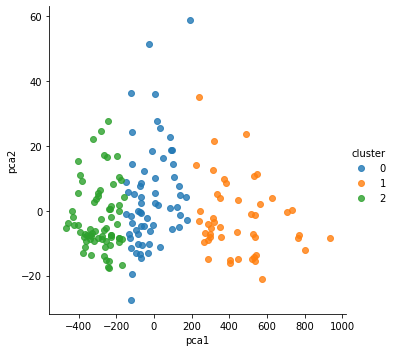

In [29]:
fig = sns.lmplot(x = 'pca1', y = 'pca2', data=kmeans_3, hue='cluster', fit_reg=False)
plt.show()

Agora que já vimos o que o k-means faz com nossos dados sobre vinhos, iremos implicar o daset integral. 

In [33]:
wine_all = pd.read_csv('datasets/vinhos/wine.csv')
print(wine_all.head())

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


Executaremos a PCA em nossos dados, como fizemos antes, e compararemos os clusters da pca com as variáveis de Vinhos.

In [36]:
pca_all = PCA(n_components=2).fit(wine_all)
pca_all_trans = pca_all.transform(wine_all)
pca_all_trans_df = pd.DataFrame(pca_all_trans, columns=['pca_all_1', 'pca_all_2'])

kmeans_3 = pd.concat([kmeans_3,
                     pca_all_trans_df,
                     wine_all['Wine']], axis=1)

Podemos comprar os agrupamentos com facxetas em nossa plotagem

IndexError: invalid index to scalar variable.

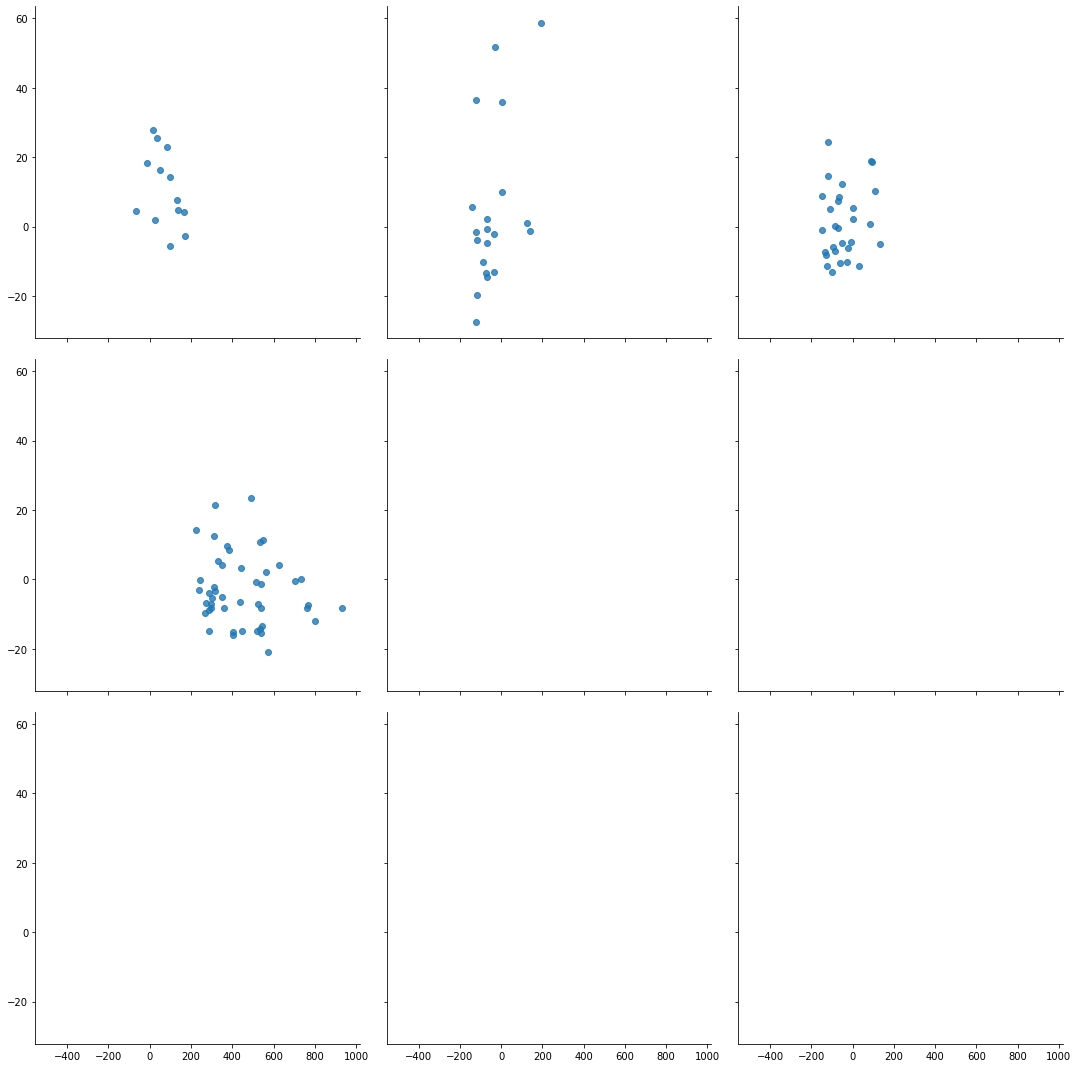

In [46]:
with sns.plotting_context(font_scale=5):
    fig = sns.lmplot(x = 'pca_all_1',
                      y='pca_all_2',
                      data=kmeans_3,
                      row='cluster', col='Wine',
                      fit_reg=False)
    plt.show()

Também podemos ver uma tabulação cruzada dos contadores de frequencia

In [38]:
print(pd.crosstab(kmeans_3['cluster'],
                  kmeans_3['Wine'],
                  margins=True))

Wine      1   2   3  All
cluster                 
0        13  20  29   62
1        46   1   0   47
2         0  50  19   69
All      59  71  48  178


### Clustering hierárquico

Como sugere o nome, um clustering hierárquico tem como objetivo contruir uma hierarquia de clusters, Isso pode ser obtido por meio de uma abordagem bottom-up (aglomerativa) ou top-dow(decisiva). Esse tipo de clustering pode ser obtido por meio da biblioteca scipy

In [43]:
from scipy.cluster import hierarchy
wine = pd.read_csv('datasets/vinhos/wine.csv')
wine = wine.drop('Wine', axis=1)

In [47]:
import matplotlib.pyplot as plt

### Clustering completo

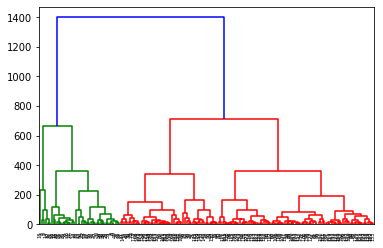

In [49]:
wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_complete)
plt.show()

### Clustering simples

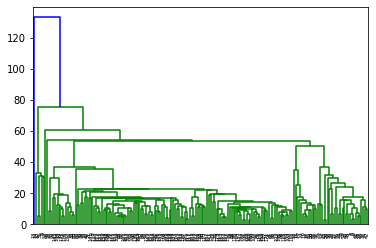

In [50]:
wine_single = hierarchy.single(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_single)
plt.show()

### Clustering com médias

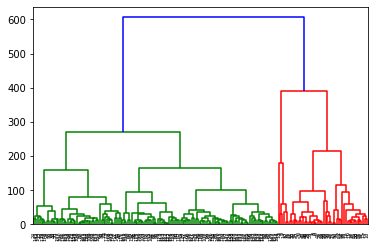

In [51]:
wine_avarenge = hierarchy.average(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_avarenge)
plt.show()

### Clustering com centroide

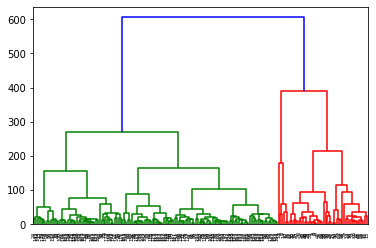

In [53]:
wine_centrid = hierarchy.centroid(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_centrid)
plt.show()

### Definindo manualmente o limite

Podemos passar o valor para color_threshold a fim de colorir os grupos com base em um limite específico. Por padrão, a scipy usa valores default do Matlab

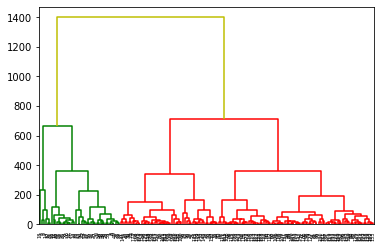

In [55]:
wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_complete,
                         color_threshold=0.7 *max(wine_complete[:,2]),
                         above_threshold_color='y')
plt.show()

Quando estiver tentando encontrar a estrutura subjacente em um conjunto de dados, muitas vezes você usará métodos de aprendizado de maquina não supervisionado. Clustering K-means(agrupamento de k-medias) e clustering hierárquico são dois métodos comumente usados para resolver esse problema. O segredo é ajustar seus modelos especificando um valor para k em k-means ou um valor de limite no clustering hierárquico que façam sentido para a pergunta que estiver tentando responder.

Misturar várias técnicas de analise para solucionar um problema também é uma prática comum. Por exemplo, você poderia usar um método de aprendizado não supervisionado para agrupar seus dados, e então utilizar esses clusters  como características em outro método de análise.